In [54]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 




{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [29]:
import os
import numpy as np
import random
import math
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt


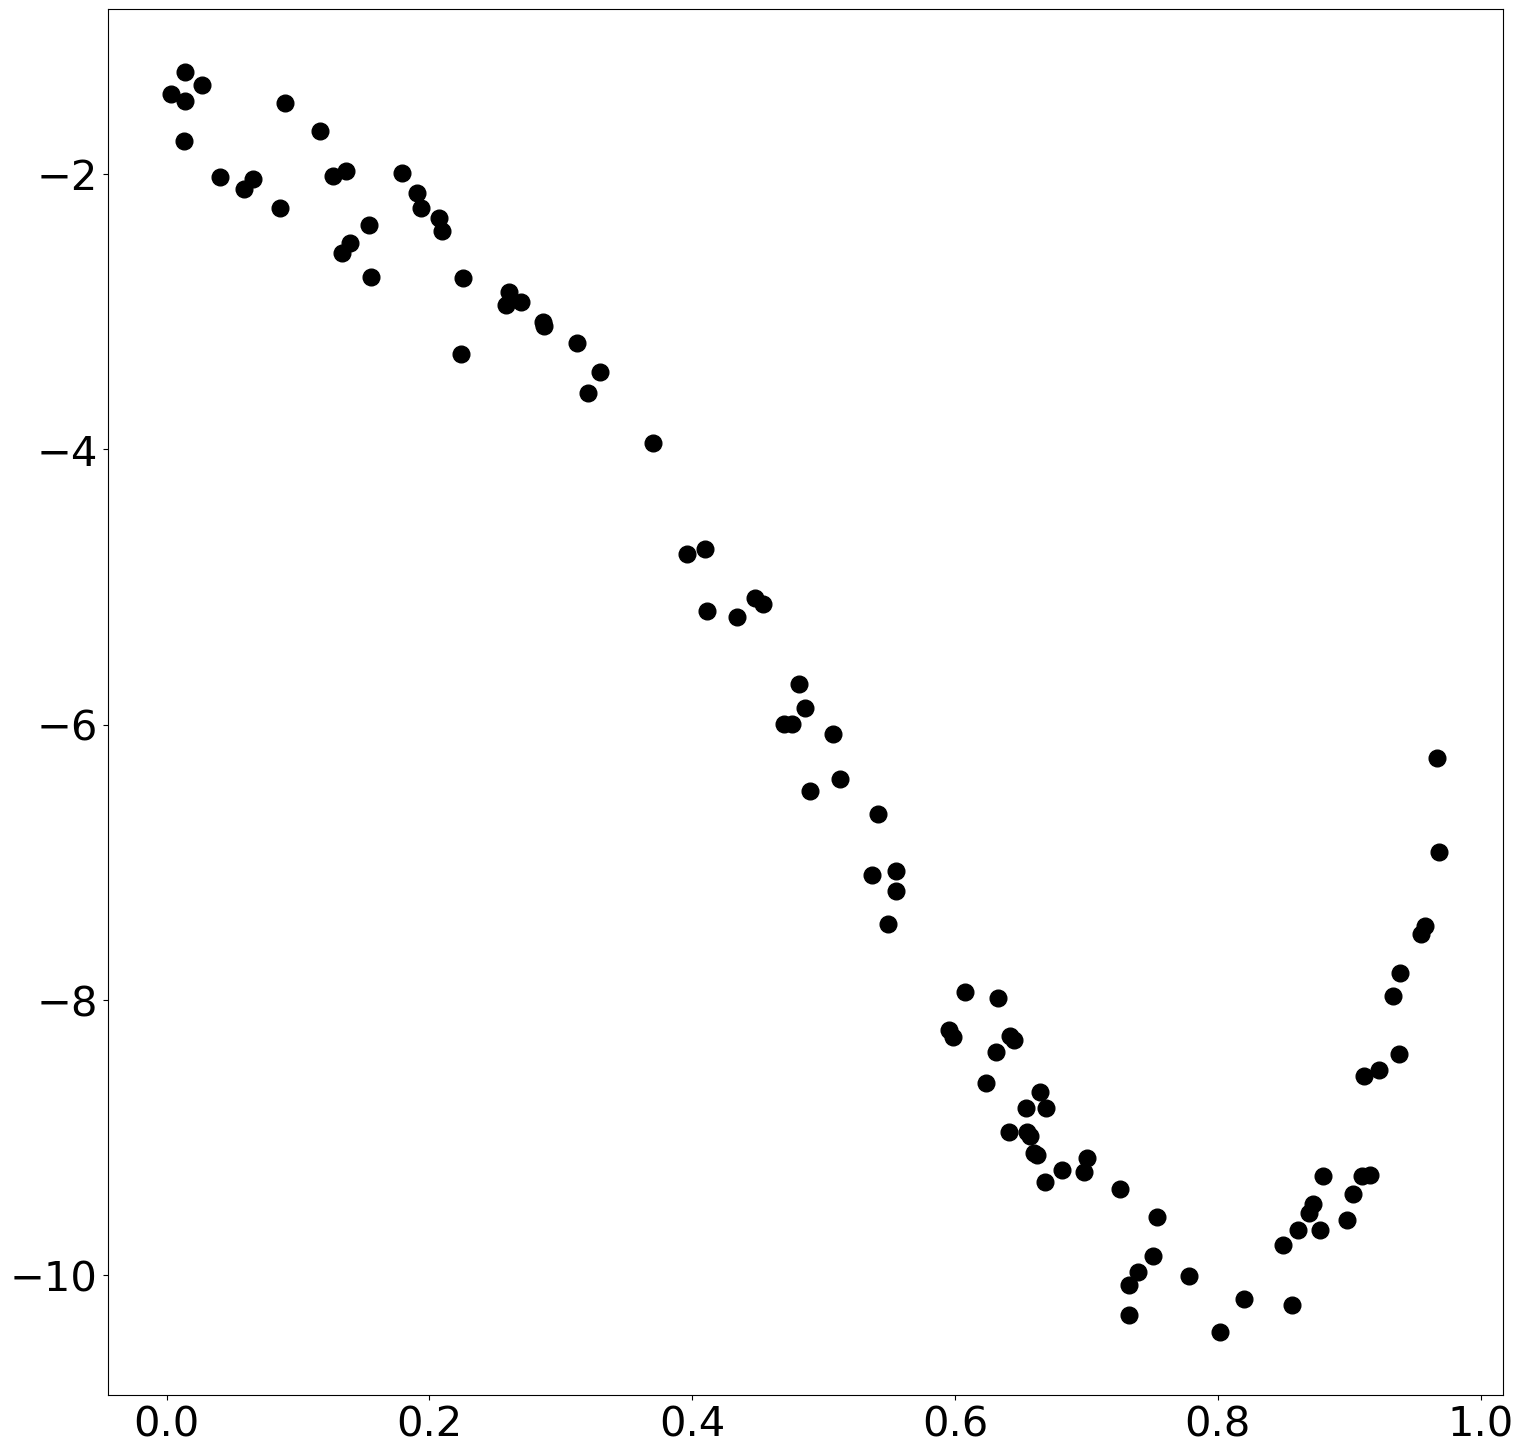

In [58]:
# p0~p9代表0次到9次方
p9,p8,p7,p6,p5,p4,p3,p2,p1,p0=1,3,5,7,9,-10,-8,-6,-4,-2
x=np.zeros(100)
y=np.zeros(100)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*1
power=[p9,p8,p7,p6,p5,p4,p3,p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [59]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    return (zeta+gamma*np.outer(x,xx))**power

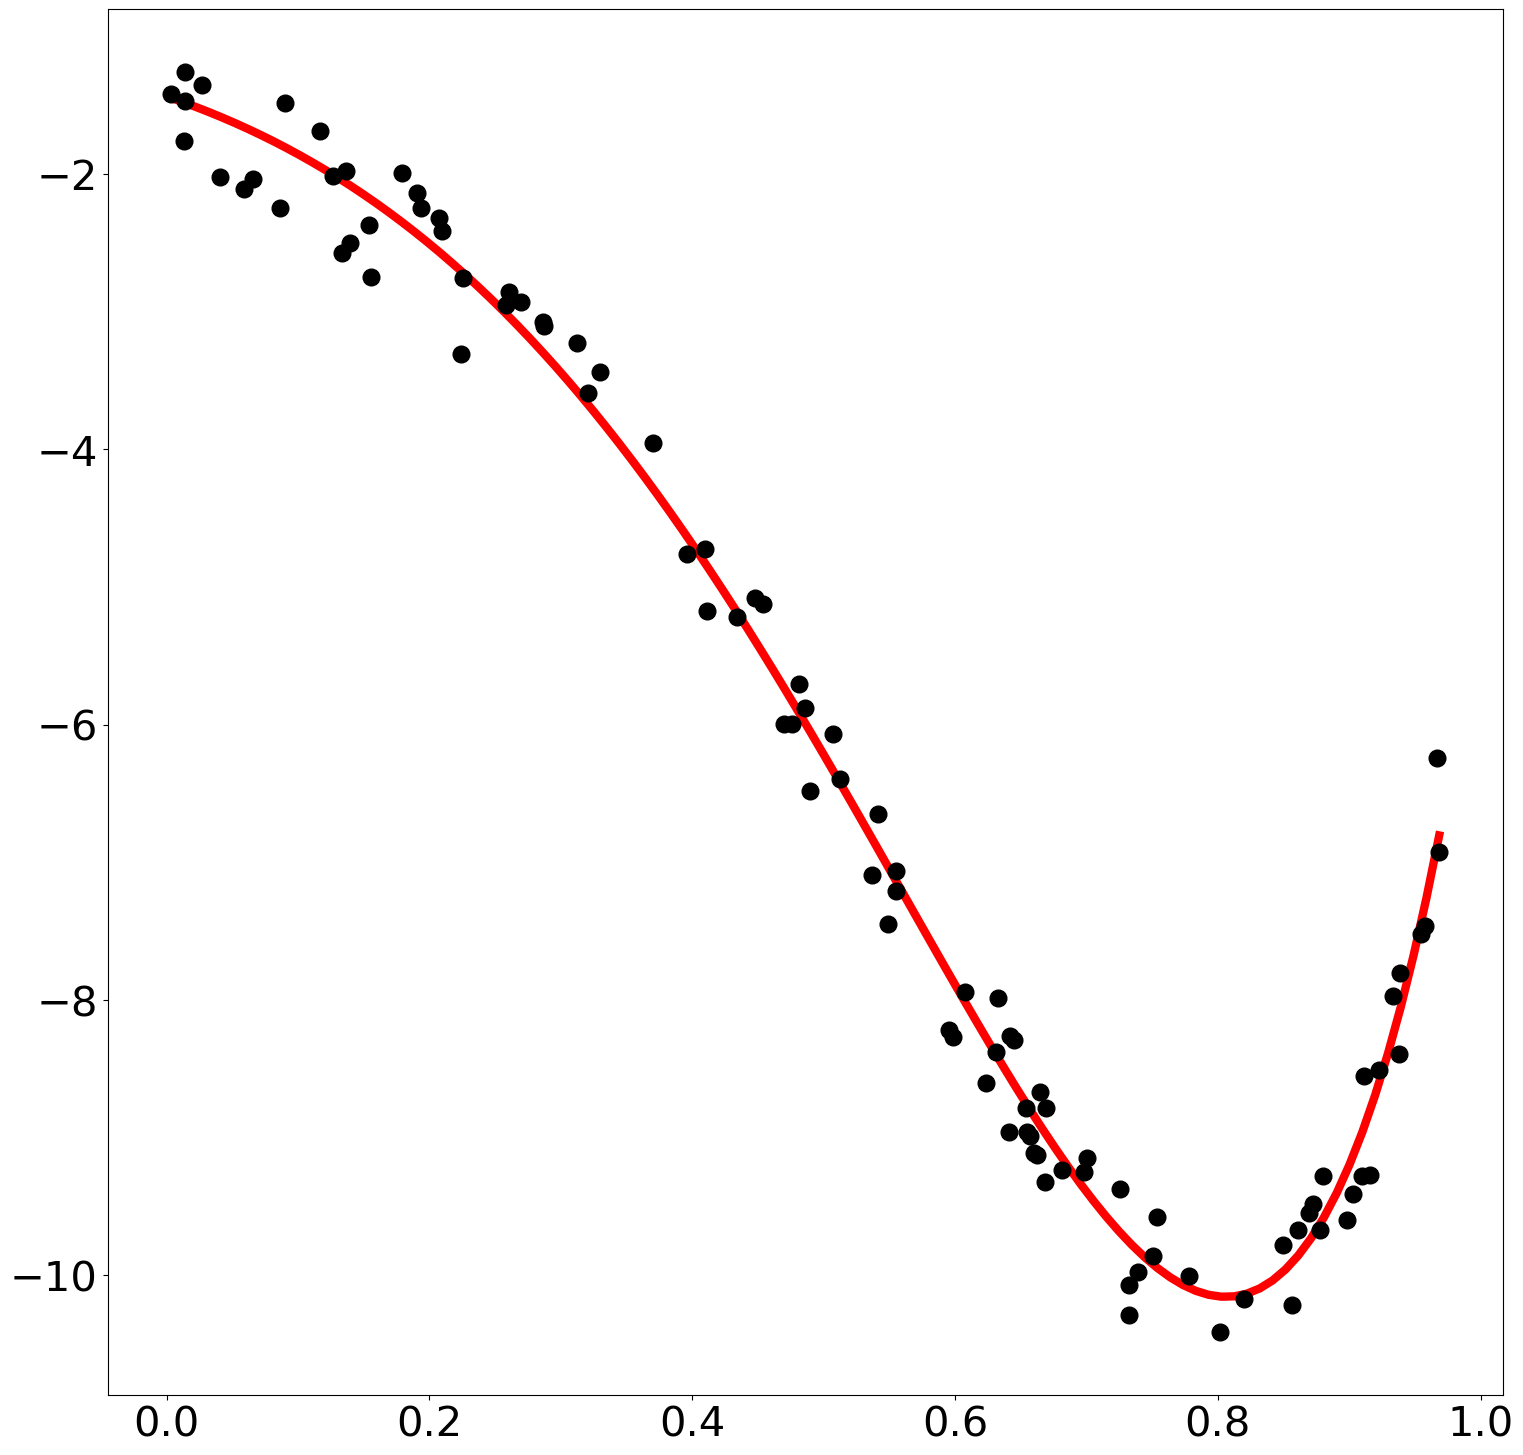

In [60]:
N=100
# c為次方數
c=9
# Polynomail Kernel 參數
gamma=1
zeta=1
# Regularization參數
lambda_2=1
# Kernel Trick
K=Polynomial_kernel(x,x,c,gamma,zeta)
# 計算alpha，可比對公式
a=np.dot(np.linalg.inv(lambda_2*np.diag(np.ones(N))+K),y)
# 建立回歸線數據點
x_plot=np.linspace(min(x),max(x),100)
K_plot=Polynomial_kernel(x_plot,x,c,gamma,zeta)
y_pred_krr=np.dot(K_plot,a)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_plot,y_pred_krr,"r-",linewidth=6)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

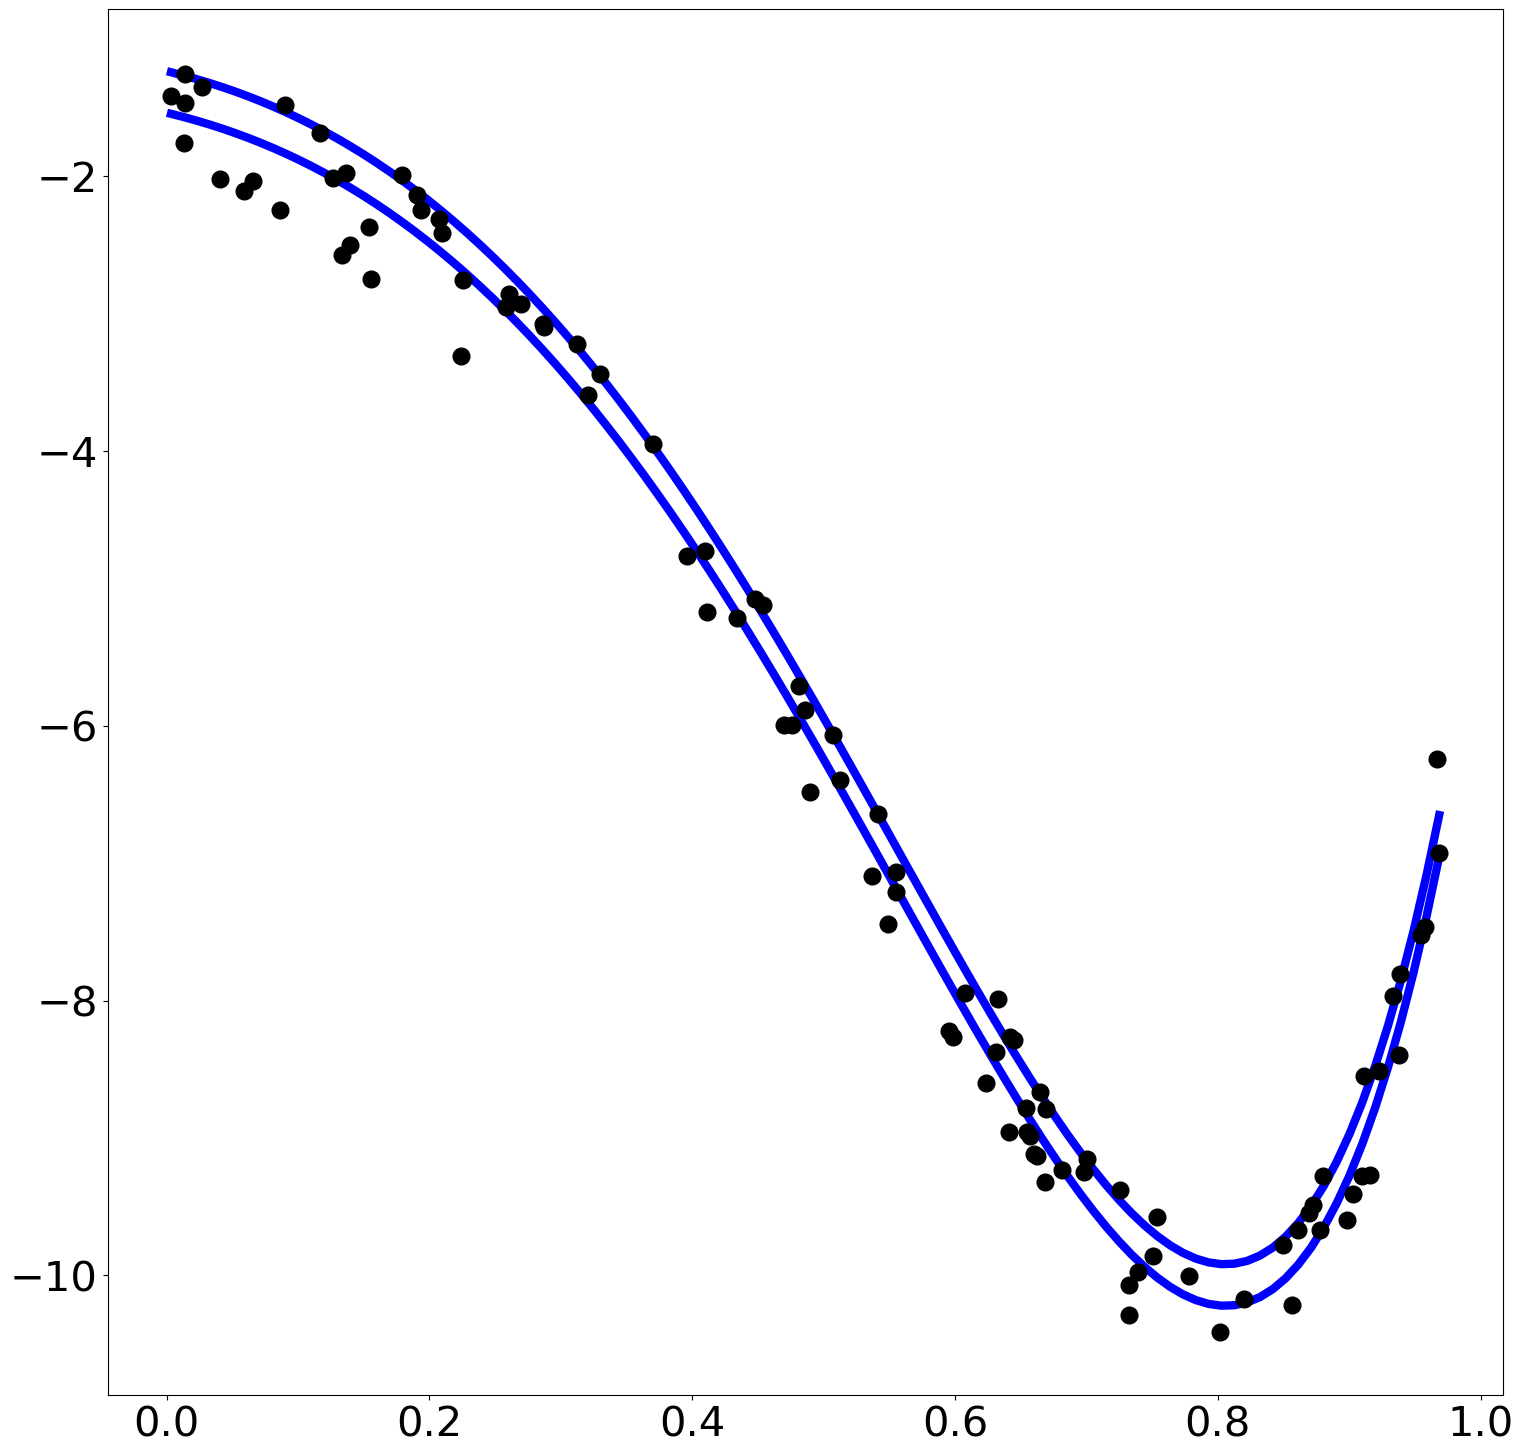

In [61]:
N=100
# c為次方數
c=9
gamma=1
zeta=1
t=0.05
CC=1
# 二次規劃(可比照公式)
Q = cvxopt.matrix(np.concatenate([np.concatenate([K,-K],axis=0),np.concatenate([-K,K],axis=0)],axis=1))
p = cvxopt.matrix(np.concatenate([np.ones(N)*t-y,np.ones(N)*t+y]),(2*N,1))
G = cvxopt.matrix(np.concatenate([np.diag(np.ones(2*N)* 1.),np.diag(np.ones(2*N)* -1.)]))
h = cvxopt.matrix(np.concatenate([CC*np.ones(2*N),np.zeros(2*N)]))
A = cvxopt.matrix(np.concatenate([np.ones(N),-np.ones(N)]),(1,2*N))
b = cvxopt.matrix(0.0)
# 利用cvxopt套件求解
cvxopt.solvers.options['show_progress'] = False
cvxopt.solvers.options['abstol'] = 1e-10
cvxopt.solvers.options['reltol'] = 1e-10
cvxopt.solvers.options['feastol'] = 1e-10
# 求出alpha值
a=np.array(cvxopt.solvers.qp(Q, p, G, h, A, b)['x']).flatten()
# a(U)-a(D)
aa=a[:N]-a[N:2*N]
# 找出上界support vector
for i in range(0,N):
    if(a[i]>10**-6):
        U_SV=i
        break
# 找出下界support vector
for i in range(N,2*N):
    if(a[i]>10**-6):
        D_SV=i
        break
# 計算上界回歸線邊界
Com=0
for i in range(0,N):
    if(abs(aa[i])>1e-6):
        Com+=aa[i]*K[i,U_SV]
b=y[U_SV]-Com
y_pred_svr_U=np.dot(K_plot,aa)+b
# 計算下界回歸線邊界
Com=0
for i in range(0,N):
    if(abs(aa[i])>1e-6):
        Com+=aa[i]*K[i,D_SV-N]
b=y[D_SV-N]-Com
y_pred_svr_D=np.dot(K_plot,aa)+b
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_plot,y_pred_svr_U,"b-",linewidth=6)
plt.plot(x_plot,y_pred_svr_D,"b-",linewidth=6)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [63]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [75]:
import os
import numpy as np
import random
import math
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_3020\2265211887.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

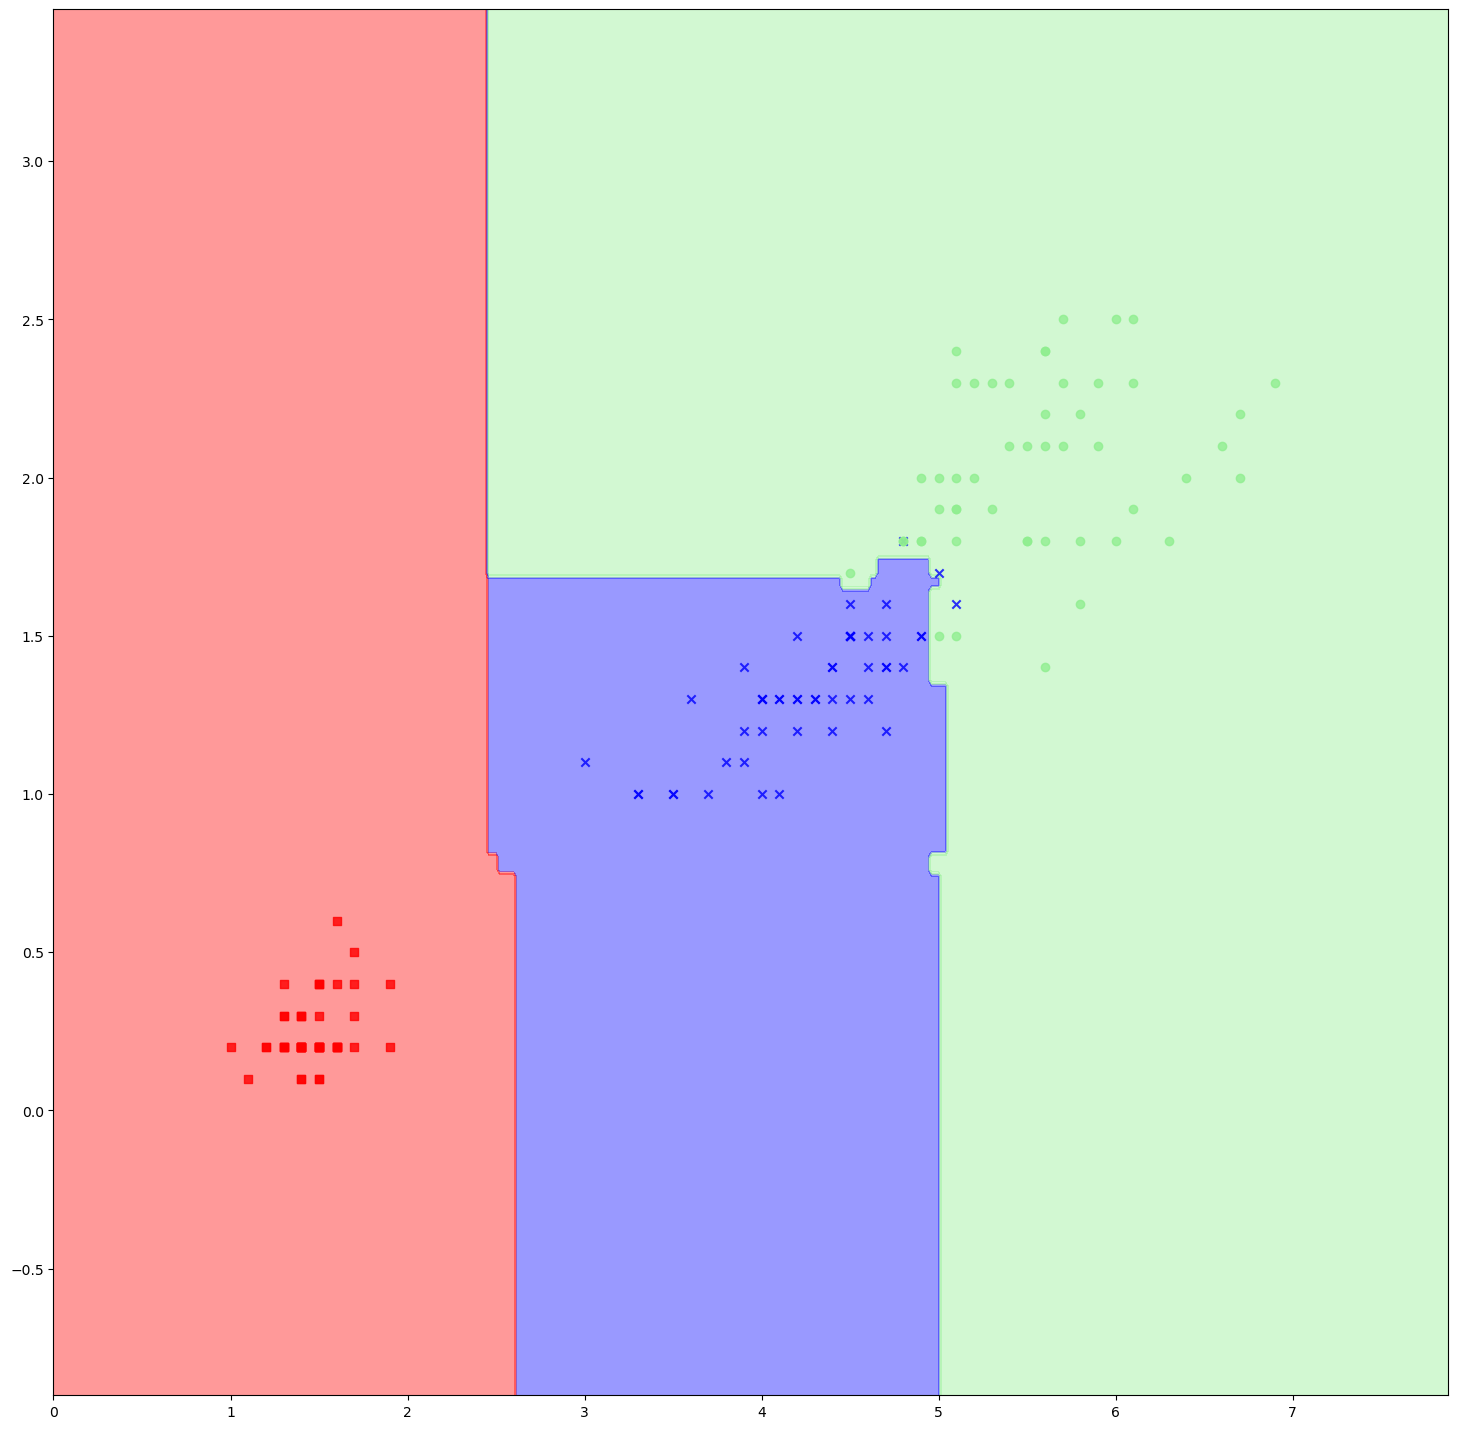

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split




def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup markers generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 =  np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    # hightlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')


def main():
  iris = datasets.load_iris()
  x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size=0.25, random_state=4)
  clf = RandomForestClassifier(n_estimators=20, max_depth=4)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  X_combined = np.vstack((x_train, x_test))
  y_combined = np.hstack((y_train, y_test))
  
  plot_decision_regions(X_combined, y_combined, classifier=clf, test_idx=range(105, 150))
  plt.xlabel('petal length [cm]')
  plt.ylabel('petal width [cm]')
  plt.legend(loc='upper left')
  plt.show()


if __name__ == '__main__':
  main()

In [123]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [118]:
import os
import numpy as np
import random
import math
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [128]:

import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [130]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

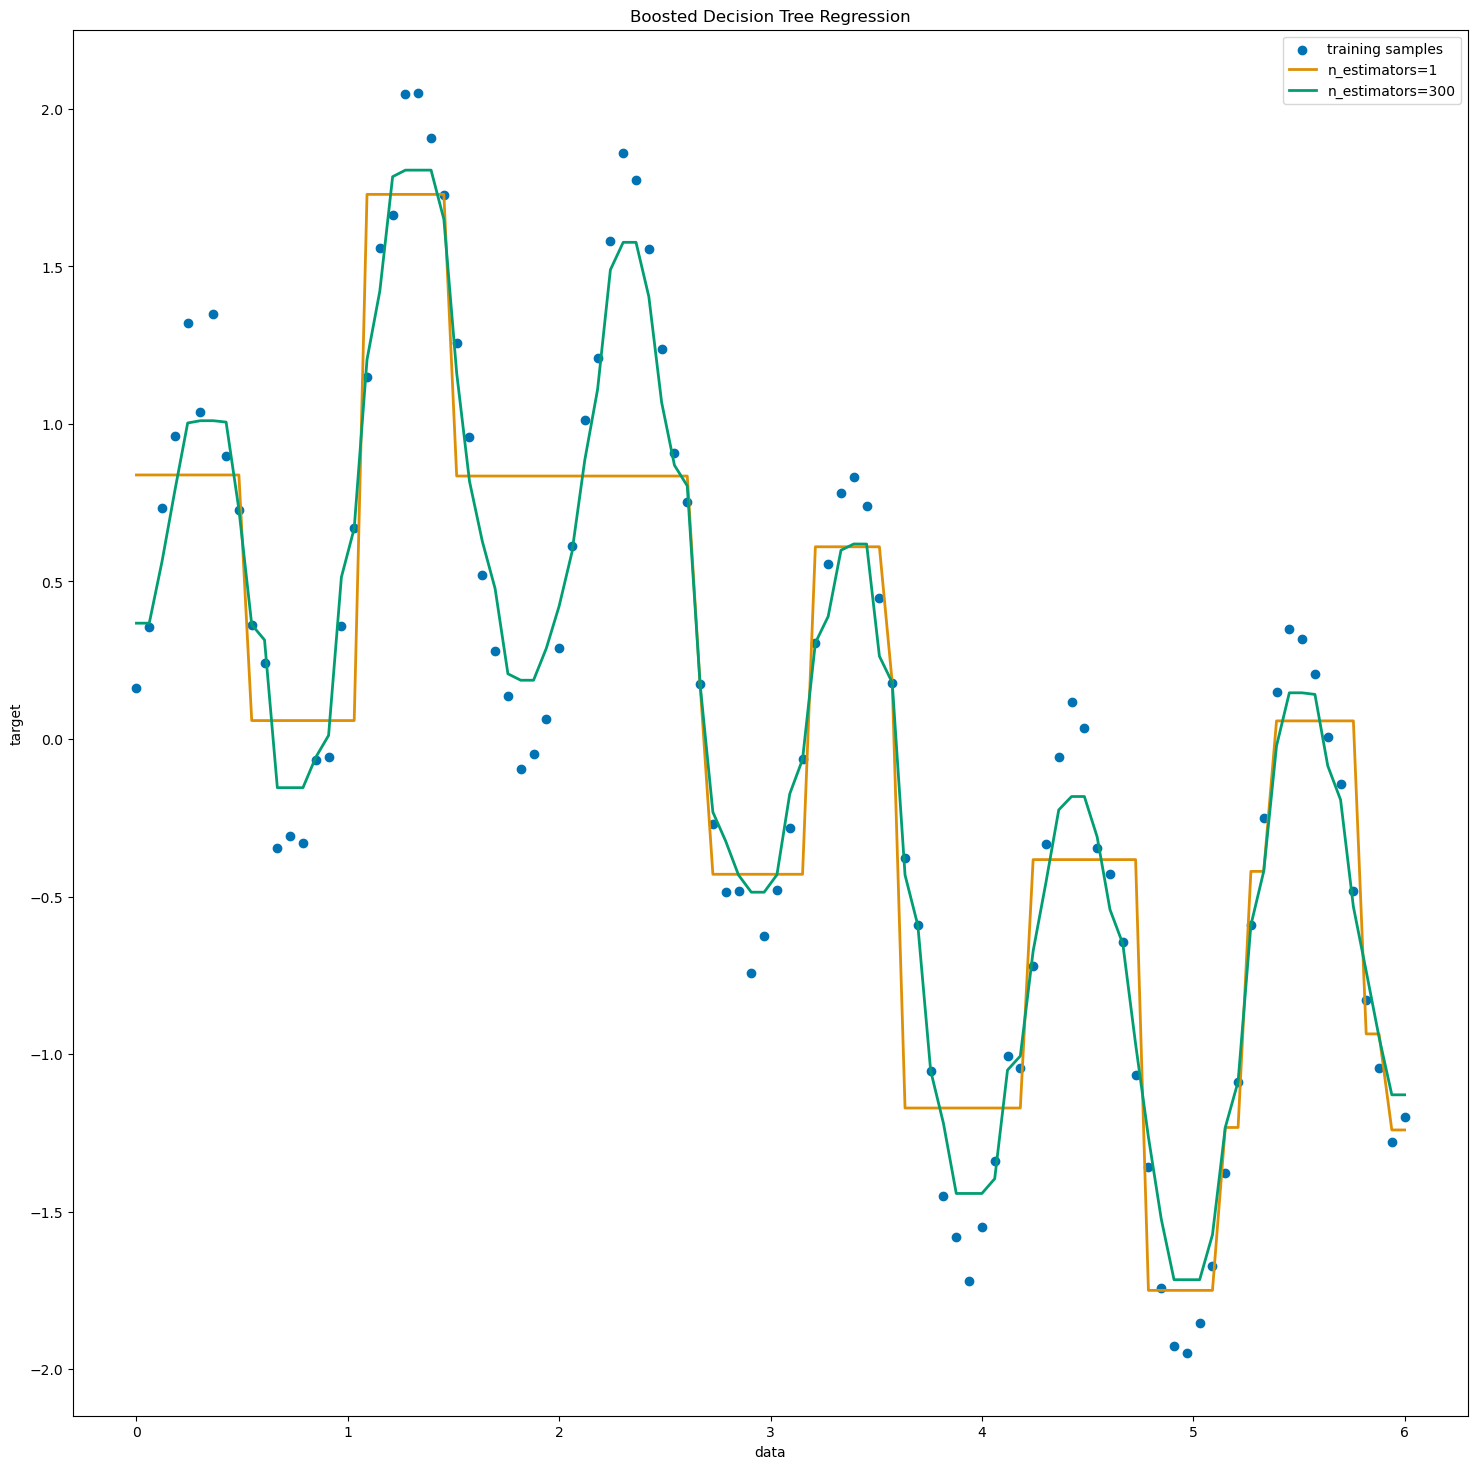

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd

p = pd.read_csv('dataset.csv')
raw_df = p
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
import pandas as pd

# Read the data directly into a pandas DataFrame
boston = p
                     

# Display the first few rows of the DataFrame
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

df = p
# Extract features (X) and target (Y) assuming specific columns
X = df.drop("LSTAT", axis=1)  # Replace "target_column" with the actual target column name
Y = df["MEDV"]

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")


# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store performance metrics for each fold
fold_metrics = []

# Start K-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    # Train the XGBoost model
    xgb_model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = xgb_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(Y_test, Y_pred)

    # Append the performance metric for this fold to the list
    fold_metrics.append(mse)

# Calculate the average performance metric across 5 folds
average_metric = np.mean(fold_metrics)

# Output the performance metrics for each fold and the average metric
for i, mse in enumerate(fold_metrics):
    print(f"Fold {i + 1} RMSE: {mse}")

print(f"Average RMSE across 5 folds: {average_metric}")


Fold 1 RMSE: 0.04997199332086154
Fold 2 RMSE: 0.21130561144705803
Fold 3 RMSE: 0.25313303112358115
Fold 4 RMSE: 0.0719498392247739
Fold 5 RMSE: 0.03974692261931124
Average RMSE across 5 folds: 0.12522147954711718


In [9]:
import numpy as np
import pandas as pd

# Assuming you have loaded the Boston Housing dataset into 'boston'
# X represents the features, and Y represents the target variable

X = pd.DataFrame(np.c_[boston['DIS'], boston['RM']], columns=['DIS', 'RM'])
Y = boston['MEDV']

# Calculate Absolute Percentage Error (APE) for each observation
ape = np.abs((Y - X.sum(axis=1)) / Y) * 100

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(ape)

print(f"Absolute Percentage Errors: {ape}")
print(f"MAPE: {mape}%")

Absolute Percentage Errors: 0      55.562500
1      47.277315
2      64.979539
3      60.897605
4      63.510497
         ...    
501    59.501786
502    59.186893
503    61.742678
504    58.259545
505    28.277311
Length: 506, dtype: float64
MAPE: 50.57735142258882%


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

df = p
# Load Boston Housing dataset
boston = p

# Extract features (X) and target (Y) assuming specific columns
X = df.drop("LSTAT", axis=1)  # Replace "target_column" with the actual target column name
y = df["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse_before = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error before feature selection: {mse_before}')

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top k features (you can choose a specific number or a percentage of features to keep)
k = 5
selected_features = feature_importance_df.head(k)['Feature'].tolist()

# Filter the data to keep only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a new XGBoost model with the selected features
model_selected = XGBRegressor()
model_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set with selected features
y_pred_selected = model_selected.predict(X_test_selected)
mse_after = mean_squared_error(y_test, y_pred_selected)
print(f'Mean Squared Error after feature selection: {mse_after}')

# Compare the performance difference
performance_difference = mse_after - mse_before
print(f'Performance Difference: {performance_difference}')

Mean Squared Error before feature selection: 0.049971993320861545
Mean Squared Error after feature selection: 0.03227679077278938
Performance Difference: -0.017695202548072164
